**Aim of this notebook :** At the end of the Linear Algebra part of the following reference book @book{Goodfellow-et-al-2016,
    title={Deep Learning},
    author={Ian Goodfellow and Yoshua Bengio and Aaron Courville},
    publisher={MIT Press},
    note={\url{http://www.deeplearningbook.org}},
    year={2016}
}, the authors suggest to write as an exercise the formulas of PCA (Principal Components Analysis). I followed their advice and decided to complete the exercise (see the pdf in the same folder) with a practical part in python, in order to check if the theory formulas are consistent with sklearn PCA functions (see the last cell). PCA is a very useful tool for datascience. What's more, the theoretical calculations are a great exercise in algebra, with matrix calculations, in-depth use of Trace matrix properties, spectral decompositions, orthogonal matrices, differentials, a matrix Lagrangian, and even optimization using the KKT theorem! See the file PCA.pdf  
**Data :** The dataset is freely accessible online https://statisticsglobe.com/datasets-for-pca .

See http://www.deeplearningbook.org for more explanations on the theory and PCA.pdf for the proofs of formulas used below.

Let's import libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

We load the data.

In [3]:
file_path = '/content/data_pca_200x16.csv'
data = pd.read_csv(file_path, sep=';', decimal=',')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,-4.44,0.99,2.92,3.24,10.02,2.65,-2.10,-1.76,-3.24,6.95,-1.08,-2.11,-4.92,-13.50,-3.09,-0.47
1,13.92,1.51,2.93,3.81,-3.15,2.20,-5.39,1.84,-2.70,-0.39,0.02,5.01,-2.22,-0.55,-0.98,0.99
2,4.57,0.48,-0.62,4.52,1.41,1.35,4.95,1.51,4.12,-1.10,0.46,-0.85,2.38,-5.09,0.70,1.36
3,6.58,1.48,-0.90,1.74,0.79,1.98,4.10,0.93,0.71,-2.11,-1.80,5.43,2.15,-0.24,0.57,1.43
4,1.78,2.84,3.61,0.05,-0.33,2.49,0.72,1.28,2.06,3.86,0.57,3.33,-1.26,0.64,-6.14,1.03


We scale the data.

In [4]:
X = data.iloc[:, :-1].values  # matrix X of size 200x15
y = data.iloc[:, -1].values   # last column y

# we normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Compute X^T * X
XTX = np.dot(X_norm.T, X_norm)

We compute the eigenvalue decomposition of X^T*X and show the Scree Plot "éboulis des valeurs propres" in french

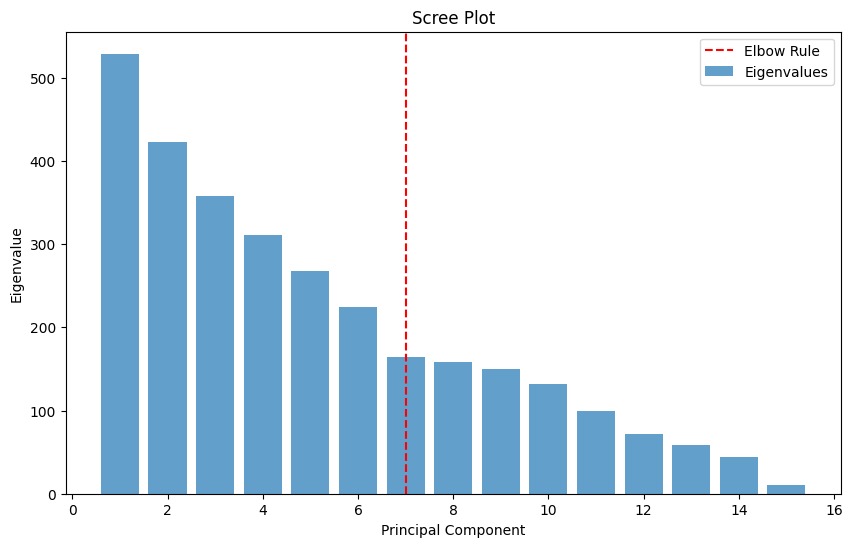

In [8]:
eig_values, eig_vectors = np.linalg.eigh(XTX)

# Sort eigenvalues by decreasing order
sorted_indices = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_indices]
eig_vectors = eig_vectors[:, sorted_indices]

# Matrices Q and Diag
Q = eig_vectors
Diag = np.diag(eig_values)

# Éboulis des valeurs propres
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eig_values) + 1), eig_values, alpha=0.7, label='Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axvline(x=7, color='r', linestyle='--', label='Elbow Rule')
plt.legend()
plt.show()

We want only to see the first principal plan (but we could be interested in other plans). We compute the encoder matrix. Then we show the result.

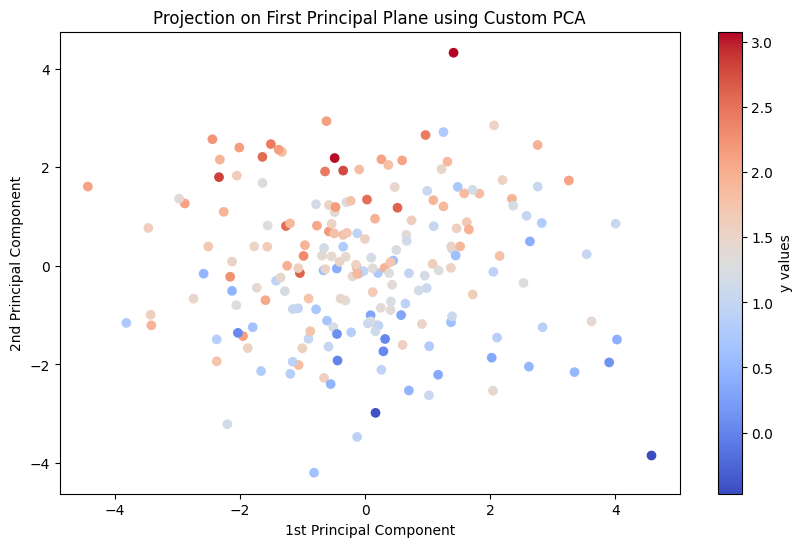

In [6]:
# Matrice d'encodage E (2 premières lignes de Q)
E = Q[:,:2]

# Projection des données dans le premier plan principal
X_projected = np.dot(X_norm, E)

# Représenter le nuage de points sur un graphique 2D (1er plan principal)
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='coolwarm')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.colorbar(label='y values')
plt.title('Projection on First Principal Plane using Custom PCA')
plt.show()

Finally we want to see if we obtain the same thing with the conventional python functions for PCA (see below). It is the same so it is good 👍

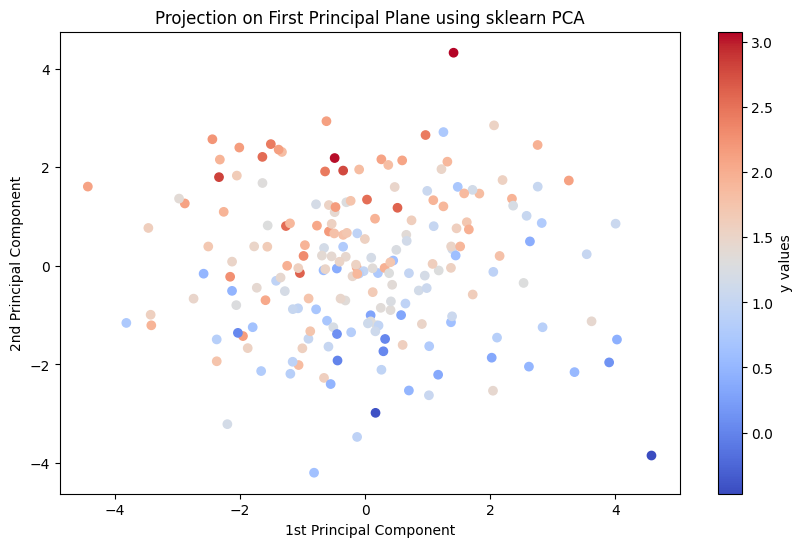

In [7]:
# PCA avec les fonctions toutes faites de Python
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Représenter encore une fois le nuage de points sur le premier plan principal
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.colorbar(label='y values')
plt.title('Projection on First Principal Plane using sklearn PCA')
plt.show()